In [1]:
# import pandas
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./data/flights_week1_jan.csv")

C:\Users\Gustavo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-03,AA,AA_CODESHARE,AA,3680,MQ,N248NN,3680,14027,PBI,...,857.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,...,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,...,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,10529,BDL,...,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,11278,DCA,...,313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280339,2018-01-07,AS,AS_CODESHARE,AS,2202,QX,N422QX,2202,14747,SEA,...,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280340,2018-01-07,AS,AS_CODESHARE,AS,2203,QX,N453QX,2203,14303,PUW,...,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280341,2018-01-07,AS,AS_CODESHARE,AS,2204,QX,N409QX,2204,14057,PDX,...,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280342,2018-01-07,AS,AS_CODESHARE,AS,2205,QX,N435QX,2205,11884,GEG,...,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We are using a sample of the first weak of 2018 and 2019

In [4]:
df.fl_date.value_counts().sort_index(ascending=True)

2018-01-01    19123
2018-01-02    21365
2018-01-03    20147
2018-01-04    16626
2018-01-05    19490
2018-01-06    17002
2018-01-07    20106
2019-01-01    19683
2019-01-02    22311
2019-01-03    21384
2019-01-04    21439
2019-01-05    18533
2019-01-06    21284
2019-01-07    21851
Name: fl_date, dtype: int64

### Create the columns 'year', 'month', 'day' separating the 'fl_date' column

In [5]:
df[["year", "month" ,"day"]] = df["fl_date"].str.split("-", expand = True)

In [6]:
df1 = df.pop('year')
df2 = df.pop('month')
df3 = df.pop('day')
df.insert(1, "year", df1)
df.insert(2, "month", df2)
df.insert(3, "day", df3)

### Now we check for all missing values and NaN values on the entire data set

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [8]:
missing_value_df

,column_name,percent_missing
fl_date,fl_date,0.000000
year,year,0.000000
month,month,0.000000
day,day,0.000000
mkt_unique_carrier,mkt_unique_carrier,0.000000
branded_code_share,branded_code_share,0.000000
mkt_carrier,mkt_carrier,0.000000
mkt_carrier_fl_num,mkt_carrier_fl_num,0.000000
op_unique_carrier,op_unique_carrier,0.000000
tail_num,tail_num,0.045658


### Drop the columns with delay values wich we are not supposed to use and also other columns with not usefull information

In [9]:
df2 = df.drop(['fl_date', 'cancellation_code', 'carrier_delay', 'weather_delay', 'nas_delay', 
          'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'], axis=1)

### Here we fill the missing values and NaN values with '0' and afterd that set an option for the notebook to show all the columns

In [10]:
df3 = df2.fillna(0)

In [11]:
pd.set_option('max_columns', None)

### Whe check for null values again and make sure we dont have any more

In [12]:
percent_missing = df3.isnull().sum() * 100 / len(df3)
missing_value_df = pd.DataFrame({'column_name': df3.columns,
                                 'percent_missing': percent_missing})

### Here we drop more columns and here are the reasons for each:

- origin - info available in origin_airport_id
- origin_city_name - info available in origin_airport_id
- dest - info available in dest_airport_id
- dest_city_name - info available in dest_airport_id
- tail_num - all unique ID
- mkt_carrier_fl_num - all unique ID
- op_carrier_fl_num - all unique ID
- flights - just "1" values in all rows
- dup - just "N" values in all rows
- mkt_carrier - same info in mkt_unique_carrier

In [13]:
df4 = df3.drop(['origin', 'origin_city_name', 'dest', 'dest_city_name', 'tail_num', 'mkt_carrier_fl_num', 
                'op_carrier_fl_num', 'flights', 'dup', 'mkt_carrier', 'mkt_unique_carrier', 'mkt_carrier', 
               'branded_code_share', 'cancelled', 'diverted'], axis=1)

### Create a copy for data integrity

In [14]:
df5 = df4.copy()
df5

,year,month,day,op_unique_carrier,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2019,01,03,MQ,14027,11278,1450,0.0,0.0,0.0,0.0,0.0,0.0,1717,0.0,0.0,147.0,0.0,0.0,857.0
1,2019,01,03,MQ,15074,11298,1152,0.0,0.0,0.0,0.0,0.0,0.0,1304,0.0,0.0,72.0,0.0,0.0,225.0
2,2019,01,01,OH,13577,11057,2157,2158.0,1.0,10.0,2208.0,2248.0,20.0,2311,2308.0,-3.0,74.0,70.0,40.0,157.0
3,2019,01,01,OH,10529,11278,1151,1212.0,21.0,7.0,1219.0,1328.0,3.0,1325,1331.0,6.0,94.0,79.0,69.0,313.0
4,2019,01,01,OH,11278,10529,1009,1013.0,4.0,32.0,1045.0,1137.0,3.0,1126,1140.0,14.0,77.0,87.0,52.0,313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280339,2018,01,07,QX,14747,16101,1017,1010.0,-7.0,13.0,1023.0,1051.0,4.0,1116,1055.0,-21.0,59.0,45.0,28.0,103.0
280340,2018,01,07,QX,14303,14747,1902,1902.0,0.0,5.0,1907.0,2006.0,6.0,2035,2012.0,-23.0,93.0,70.0,59.0,250.0
280341,2018,01,07,QX,14057,14747,933,927.0,-6.0,11.0,938.0,1012.0,11.0,1029,1023.0,-6.0,56.0,56.0,34.0,129.0
280342,2018,01,07,QX,11884,14747,2022,2013.0,-9.0,9.0,2022.0,2109.0,18.0,2148,2127.0,-21.0,86.0,74.0,47.0,224.0


### Now we build a new variable (column 'delayed') indicating whether or not flights are delayed and use it to filter and count the number o delays per each carrier

In [15]:
df5['delayed'] = df5['arr_delay'].apply(lambda x: x > 0)

In [16]:
delayed_flights = df5[df5['delayed'] == True] #filter to only rows where delayer == True
delayed_flights['op_unique_carrier'].value_counts() #count the number of rows for each carrier

WN    21200
AA    13825
OO    10686
UA     7600
DL     6950
B6     5482
MQ     4815
OH     3943
YX     3651
YV     3237
AS     2785
EV     2760
NK     2351
9E     1926
G4     1846
F9     1835
ZW     1634
QX     1539
AX     1336
HA     1252
PT     1229
CP     1207
G7      980
C5      964
VX      528
EM       86
KS       58
9K       13
Name: op_unique_carrier, dtype: int64

### Now we calculate the proportion of flights that were delayed

In [17]:
df5.groupby(['op_unique_carrier','delayed']).size().unstack()

delayed,False,True
op_unique_carrier,,
9E,5481,1926
9K,64,13
AA,20599,13825
AS,5616,2785
AX,1643,1336
B6,4986,5482
C5,834,964
CP,2314,1207
DL,22825,6950


### Here we assign the values to a new data frame "delayed_by_carrier" and add a new 'clean' index

In [18]:
delayed_by_carrier = df5.groupby(['op_unique_carrier','delayed']).size().unstack().reset_index()
delayed_by_carrier[:5]

delayed,op_unique_carrier,False,True
0,9E,5481,1926
1,9K,64,13
2,AA,20599,13825
3,AS,5616,2785
4,AX,1643,1336


### Calculate a new variable "flights_count" with the total delayed and not delayed flights

In [19]:
delayed_by_carrier['flights_count'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:5]

delayed,op_unique_carrier,False,True,flights_count
0,9E,5481,1926,7407
1,9K,64,13,77
2,AA,20599,13825,34424
3,AS,5616,2785,8401
4,AX,1643,1336,2979


### And now we calculate the percentage of flights delayed per each carrier and sort it by 'percentage_delayed'

In [20]:
delayed_by_carrier['percentage_delayed'] = (delayed_by_carrier[True] / delayed_by_carrier['flights_count'])*100
delayed_by_carrier.sort_values('percentage_delayed', ascending=False)

delayed,op_unique_carrier,False,True,flights_count,percentage_delayed
15,KS,50,58,108,53.703704
6,C5,834,964,1798,53.615128
5,B6,4986,5482,10468,52.369125
9,EM,83,86,169,50.887574
12,G4,1939,1846,3785,48.771466
4,AX,1643,1336,2979,44.847264
16,MQ,6054,4815,10869,44.300304
27,ZW,2064,1634,3698,44.186047
11,F9,2532,1835,4367,42.019693
24,WN,29303,21200,50503,41.977704


### One option to check the mean (general idea of how many minutes flights were delayed for each airline) its to use a pivot table with the carrier and the delay. It returns the mean of the delay for each carrier 

In [21]:
df5.pivot_table(columns='op_unique_carrier', values='arr_delay', aggfunc=np.mean)

op_unique_carrier,9E,9K,AA,AS,AX,B6,C5,CP,DL,EM,EV,F9,G4,G7,HA,KS,MQ,NK,OH,OO,PT,QX,UA,VX,WN,YV,YX,ZW
arr_delay,-0.839611,-4.831169,5.950529,0.445899,21.084256,29.693065,26.163515,4.006248,-4.142636,6.568047,9.618741,11.799405,14.635139,6.830973,3.609001,13.212963,8.316864,2.815762,5.961973,13.219505,2.989821,0.898967,4.133593,2.113994,4.390749,10.642056,2.273396,22.672796


### Another option to check the general stats per carrier is use the .describe() function with each carrier. In this case we check for 'WN'

In [29]:
carrier_delay_stats = df5[df5['op_unique_carrier'] == 'WN']['arr_delay']

In [30]:
carrier_delay_stats.describe()

count    50503.000000
mean         4.390749
std         29.258698
min        -73.000000
25%        -11.000000
50%         -3.000000
75%         11.000000
max        550.000000
Name: arr_delay, dtype: float64

### Plot an histogram for the delay distribution of each carrier. We start for creating the bins for the X intervals. We use a 10 minutes interval (step=10), starting with 100 minutes early (start=-100) and ending at 200 minutes late (stop=200)

In [25]:
bin_values = np.arange(start=-100, stop=200, step=10)
bin_values

array([-100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,
         10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190])

In [32]:
# df5['op_unique_carrier'].value_counts()

### Here is the histogram for WN carrier 

<AxesSubplot:>

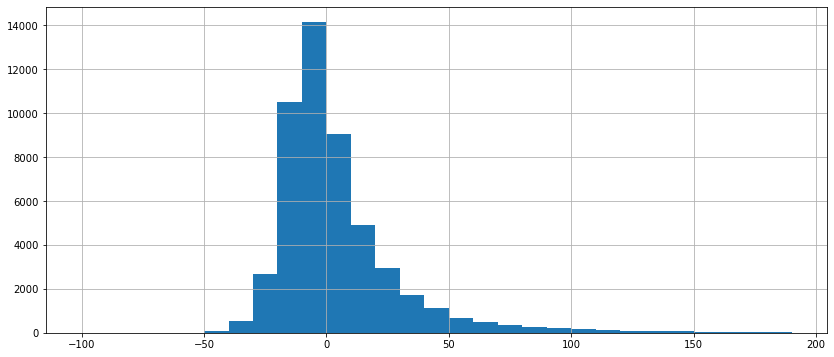

In [31]:
wn_carrier = df5[df5['op_unique_carrier'] == 'WN']
wn_carrier['arr_delay'].hist(bins=bin_values, figsize=[14,6])